# Processing data

Read data already collected

In [188]:
import json
import time
import datetime
import pandas as pd
import numpy as np

tweets_data_morn = '/Users/Madhu/Documents/Courses/data_bds/bitcoin'
tweets_data_eve = '/Users/Madhu/Documents/Courses/data_bds/btctwitter3'

tweets_data_m = []
tweets_data_e = []

tweets_file = open(tweets_data_morn, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data_m.append(tweet)
    except:
        continue
        
tweets_file = open(tweets_data_eve, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data_e.append(tweet)
    except:
        continue


In [189]:
print (len(tweets_data_m))

8035


In [190]:
print (len(tweets_data_e))

20039


In [191]:
tweets_data_e[0]['created_at']

'Sun Oct 29 07:53:29 +0000 2017'

In [192]:
date_col = []
lang = []
text = []

for line in tweets_data_e:
    try:
        date_col.append(datetime.datetime.strptime(line['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
        lang.append(line['lang'])
        text.append(line['text'])
    except:
        continue

In [193]:
d = {'date': date_col, 'lang': lang, 'text':text}
df = pd.DataFrame(data=d)

In [194]:
df.tail()

,date,lang,text
20032,2017-10-29 10:49:47,en,"RT @cryptoworldnews: South Korea to Regulate Bitcoin as Commodity, Says Bank of Korea Governor https://t.co/QzJZ7Nqwcd https://t.co/3ppkieu…"
20033,2017-10-29 10:49:47,en,RT @OnlineBizOp101: From Warren Buffett to Jamie Dimon: Legendary market voices who have shunned Bitcoin and ICOs https://t.co/DHIQuTLHwp
20034,2017-10-29 10:49:48,en,RT @alttradex: Join the future of crypto trading! Grab your 20% BONUS: https://t.co/QGeqI8Cp9E #Alttradex #ICO #Bitcoin #Ethereum…
20035,2017-10-29 10:49:48,en,RT @areebakhan007: #stratis releasing #masternode on 30 october (Buy $strat) $BTC $WINGS $DGB $STRAT $OKCash $BTS $LUN $PAY $NEO $ZEC…
20036,2017-10-29 10:49:49,en,RT @Fintastico_com: Happy to see RATE ICO joining our #fintech community \n\n👉 https://t.co/7hlmljECmG\n\n@rateico #ICOs #crypto https://t.co/I…


In [195]:
df_en = df[df['lang']=='en']

In [196]:
pd.set_option('max_colwidth',150)
#df_en['text']
df_en.head()

,date,lang,text
1,2017-10-29 07:53:29,en,Virtual Coins: 1 bitcoin = $5815.8 / 5009.735€1 bitcoin-cash = $451.321 / 388.768€1 ethereum = $299.488 / 257.979€#bitcoin #ethereum #bitco…
3,2017-10-29 07:53:30,en,"CNBCTraders: RT TopFiveTraders ""RT StakepoolCom ""Market Update (10/28/17) | Bitcoin Gold fails &amp; markets look towards Segwit2x Check It Ou…"
5,2017-10-29 07:53:30,en,RT @curtmelonopoly: The call $BTC $XBTUSD ... the hammer down long (white arrow) ... the action after the call - private member Bitcoin…
6,2017-10-29 07:53:31,en,https://t.co/V7IAyJzq0Z: #Bitcoin $1 USD is equal to ฿0.00017197 BTC! #GoldCoinJar
8,2017-10-29 07:53:31,en,Alien ஏலியன்: Hi I am new to #bitcoin Who are all using #bitcoin as currency. Send me #bitcoin bitcoin:1mnpS33yjopkSHN94SaUt32XQv5y5fqiL


In [197]:
times = pd.DatetimeIndex(df_en['date'])
grouped = df_en.groupby([times.hour, times.minute])['text'].agg(['count'])

In [198]:
grouped.columns

Index(['count'], dtype='object')

In [199]:
df_en.to_csv('bitcoin_eng.csv') # this has all 4 bitcoins
#get data from the csv directly instead of running it till now

In [200]:
from pycorenlp import StanfordCoreNLP

In [201]:
nlp = StanfordCoreNLP('http://localhost:9000')

## Sample stanfordcoreNLP

In [24]:
res = nlp.annotate("I love you. I hate him. You are nice. He is dumb",
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
for s in res["sentences"]:
    print ("%d: '%s': %s %s" % (s["index"]," ".join([t["word"] for t in s["tokens"]]),s["sentimentValue"], s["sentiment"]))

0: 'I love you .': 3 Positive
1: 'I hate him .': 1 Negative
2: 'You are nice .': 3 Positive
3: 'He is dumb': 1 Negative


In [202]:
#filtering the tweets
#df_en.head()

senti_val = []
senti = []

for line in df_en['text']:
    res = nlp.annotate(line,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
    senti_val.append(s["sentimentValue"])
    senti.append(s["sentiment"])
    

In [203]:
myset = set(senti)
print (myset)

{'Neutral'}


In [204]:
print (set(senti_val))

{'2'}


In [205]:
times = pd.DatetimeIndex(data.datetime_col)
grouped = df.groupby([times.hour, times.minute])

NameError: name 'data' is not defined

## Price of BTC

In [206]:
bitcoin_price = pd.read_csv('/Users/Madhu/Documents/Courses/data_bds/price_BTC_oct29.csv')

In [207]:
bitcoin_price.head()

,Date,Close Price
0,10/29/17 0:01,5732.03
1,10/29/17 0:02,5731.65
2,10/29/17 0:03,5728.94
3,10/29/17 0:04,5729.98
4,10/29/17 0:05,5727.90


In [213]:
datetime.datetime.strptime(bitcoin_price.iloc[0]['Date'],'%m/%d/%y %H:%M')

datetime.datetime(2017, 10, 29, 0, 1)

In [220]:
price_date_col = []
vals = []

for i in range(len(bitcoin_price)):
    try:
        price_date_col.append(datetime.datetime.strptime(bitcoin_price.iloc[i]['Date'],'%m/%d/%y %H:%M'))
        vals.append(bitcoin_price.iloc[i]['Close Price'])
    except:
        continue


In [229]:
price_data = {'date': price_date_col, 'value': vals}
price_df = pd.DataFrame(data=price_data)

In [230]:
#price_df = price_df[

#price_df['date']>datetime.datetime(2017, 10, 27, 0, 0)


/Users/Madhu/Downloads/softwares/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


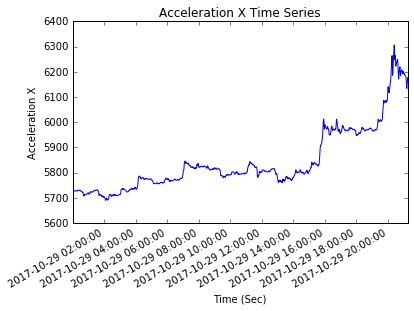

In [231]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

%matplotlib inline

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.plot(price_date_col, vals,'b')
plt.gcf().autofmt_xdate()
plt.title('Acceleration X Time Series')
plt.xlabel('Time (Sec)')
plt.ylabel('Acceleration X')
plt.legend()

#bitcoin_price_.plot()

Sample of grouping using date and count

In [232]:
price_df['date_tuple'] = price_df['date'].map(lambda x : (x.hour, x.minute))

In [235]:
price_df = price_df[price_df['date_tuple']>(7,45)]
price_df = price_df[price_df['date_tuple']<(11,0)]

In [226]:
price_df.drop(['date'], axis = 1, inplace = True)

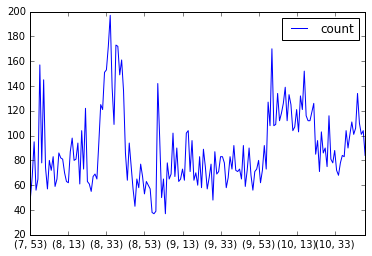

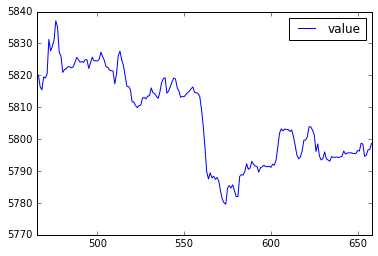

In [237]:
times = pd.DatetimeIndex(df_en['date'])
grouped = df_en['text'].groupby([times.hour, times.minute]).agg(['count'])
grouped.plot()
#df_en.groupby(['date_tuple']).size().reset_index(name='counts')

price_df.plot()

In [257]:
price_df.to_csv('price2.csv')

In [241]:
grouped.to_csv('tweetcount.csv')

In [258]:
r = pd.read_csv('price.csv')

In [259]:
r.head()

,Date,BTC Price,Tweet Counts
0,10/29/17 7:53,5831.28,49
1,10/29/17 7:54,5827.69,67
2,10/29/17 7:55,5829.05,95
3,10/29/17 7:56,5831.08,56
4,10/29/17 7:57,5837.11,65


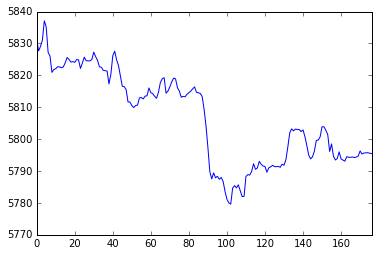

In [265]:
r['BTC Price'].plot()

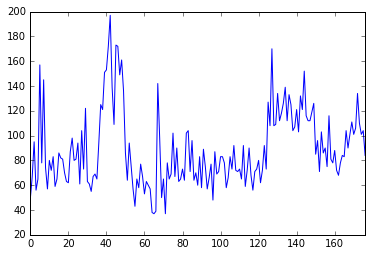

In [263]:
r['Tweet Counts'].plot()

In [ ]:
price_date_col_ = []
vals_ = []

for i in range(len(bitcoin_price)):
    try:
        price_date_col.append(datetime.datetime.strptime(bitcoin_price.iloc[i]['Date'],'%m/%d/%y %H:%M'))
        vals.append(bitcoin_price.iloc[i]['Close Price'])
    except:
        continue


In [249]:
# plt.plot(r['Date'],r['BTC Price'])
# plt.show()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y %H:%M'))
plt.plot(r['Date'], r['BTC Price'],'b')
plt.gcf().autofmt_xdate()
plt.title('Acceleration X Time Series')
plt.xlabel('Time (Sec)')
plt.ylabel('Acceleration X')
plt.legend()

ValueError: could not convert string to float: '10/29/17 10:49'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11e811400> (for post_execute):


ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()